In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

%matplotlib inline

In [2]:
diabetes=load_diabetes()

In [3]:
df_feature=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df_feature.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
df_target=pd.DataFrame(diabetes.target,columns=['Target'])
df_target.head()

,Target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


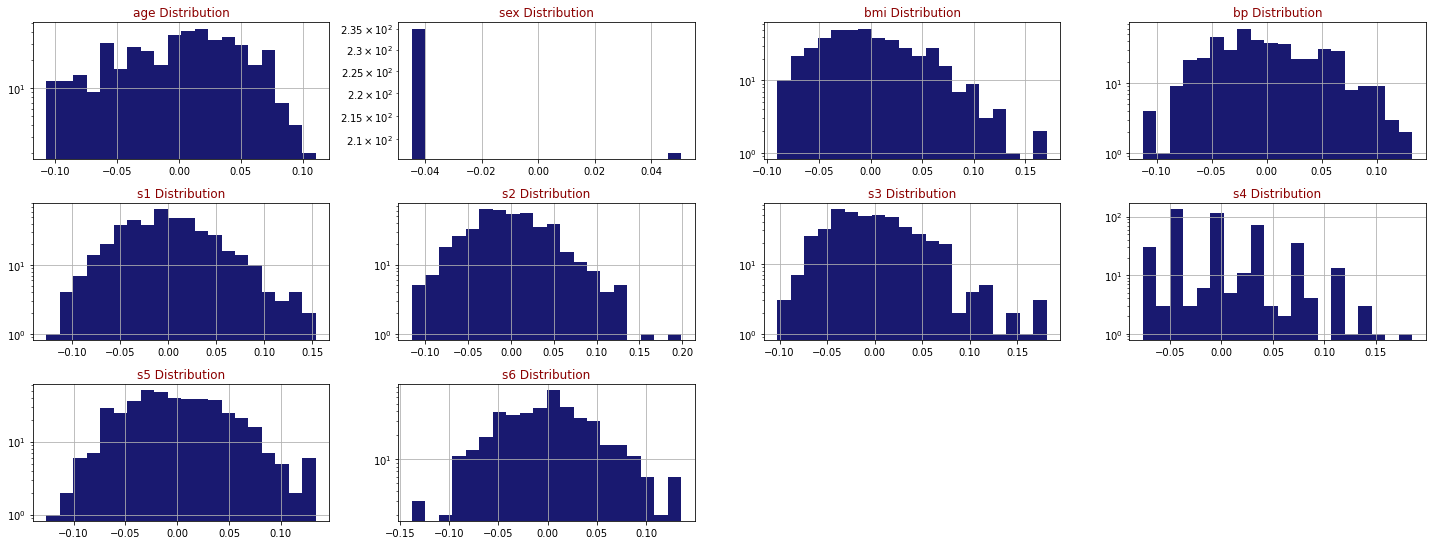

In [5]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

draw_histograms(df_feature,df_feature.columns,8,4)

# Linear Equation

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df_feature)

 VIF & Feature Selection

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=x_scaled
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif['features']=df_feature.columns
vif

,VIF,features
0,1.217307,age
1,1.278073,sex
2,1.509446,bmi
3,1.459429,bp
4,59.203786,s1
5,39.194379,s2
6,15.402352,s3
7,8.890986,s4
8,10.076222,s5
9,1.484623,s6


In [42]:
df_feature.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [58]:
df_feature_FS=df_feature[['bmi','sex','age','bp','s6']]
df_feature_FS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bmi     442 non-null    float64
 1   sex     442 non-null    float64
 2   age     442 non-null    float64
 3   bp      442 non-null    float64
 4   s6      442 non-null    float64
dtypes: float64(5)
memory usage: 17.4 KB


In [45]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df_feature_FS)

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x_scaled,df_target)


<ipython-input-46-cc7a317dc70f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(x_scaled,df_target)


ExtraTreesRegressor()

In [51]:
selection.score(x_scaled,df_target)

1.0

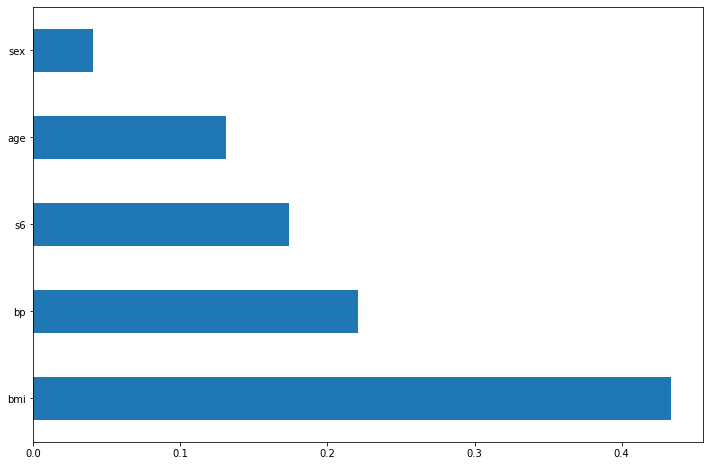

In [52]:
plt.figure(figsize=(12,8))
feat_importances=pd.Series(selection.feature_importances_,index=df_feature_FS.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
linear=LinearRegression()
linear.fit(x_scaled,df_target)

LinearRegression()

# check r2 & adj r2 using stats model

In [55]:
import statsmodels.api as sm
X1 = sm.add_constant(x_scaled)
result = sm.OLS(df_target, X1).fit()
#print dir(result)
print(result.rsquared, result.rsquared_adj)
# 0.877643371323 0.863248473832

0.41363575544605635 0.40691139484337346


In [14]:
df=list(df_feature.columns)
df1=list(linear.coef_[0])
i=0
namelst=[]
for col in df:
    namelst.append(col)
print(namelst)
print(df1)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[-0.4762316851650339, -11.40703081835447, 24.726257130770435, 15.42967916198683, -37.68035801240313, 22.676487009275977, 4.806200084954797, 8.422083998610205, 35.734713160261606, 3.2166116079676854]


In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,df_target,test_size = 0.25,random_state=0)
linear.fit(x_train,y_train)

LinearRegression()

In [57]:
linear.score(x_train,y_train)

0.44801423004029683

In [59]:
def adjusted_r2(x,y):
    r2=linear.score(x,y)
    n=x_train.shape[0]
    p=x_train.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2


In [60]:
adjusted_r2(x_train,y_train)

0.439522141271686

In [61]:
linear.score(x_test,y_test)

0.2741393917683095

In [62]:
adjusted_r2(x_test,y_test)

0.2629723054878219

In [63]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV

In [64]:
lassocv=LassoCV(cv=10)
lassocv.fit(x_train,y_train)

c:\users\703202952\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(cv=10)

In [65]:
alpha=lassocv.alpha_
alpha

2.0408205029455164

In [66]:
lass_reg=Lasso(alpha)
lass_reg.fit(x_train,y_train)

Lasso(alpha=2.0408205029455164)

In [67]:
lass_reg.score(x_train,y_train)

0.44537206476347047

In [68]:
lass_reg.score(x_test,y_test)

0.27768668466095314

In [69]:
np.random.uniform(low=0,high=10,size=(20,))

array([0.53336468, 6.26945694, 6.81205809, 4.62217541, 3.68189866,
       8.7683693 , 2.78606456, 5.34988532, 5.77083365, 9.52814669,
       8.16663894, 1.64113042, 9.35025921, 9.26014824, 2.21774554,
       6.49417079, 9.66299338, 2.69228976, 2.23396882, 1.30797693])

In [70]:
alphas_ridge=np.random.uniform(high=10,size=(50,))
rigdecv=RidgeCV(alphas=alphas_ridge,cv=10)
rigdecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.74390128, 4.44298012, 3.85227224, 2.8376189 , 1.38972602,
       7.79944111, 4.63494255, 0.8301254 , 7.76110873, 5.76750351,
       4.31241477, 1.8972455 , 6.35936213, 3.00808019, 0.69229673,
       3.05204796, 0.4189491 , 2.48790896, 6.24634176, 3.80641666,
       5.03687726, 6.31473314, 1.71064785, 0.25277517, 0.23971595,
       5.51406642, 7.56103869, 5.69495164, 6.65725527, 6.26053644,
       7.56241542, 4.82949926, 6.59644349, 2.68100586, 1.21096786,
       0.25668532, 6.48320321, 2.90484578, 9.40741942, 4.01847109,
       9.84289076, 3.97318297, 6.15901504, 6.16749052, 1.1276181 ,
       8.10175552, 0.04442817, 1.50893567, 5.78050485, 5.51479   ]),
        cv=10)

In [71]:
rigdecv.score(x_train,y_train)

0.44780292024956514

In [72]:
ridge=Ridge(rigdecv.alpha_)
ridge.fit(x_train,y_train)

Ridge(alpha=9.842890762133647)

In [73]:
ridge.score(x_test,y_test)

0.27913250382809773

In [74]:
elascv=ElasticNetCV(cv=10)
elascv.fit(x_train,y_train)

c:\users\703202952\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ElasticNetCV(cv=10)

In [75]:
elascv.alpha_

0.1536711637355157

In [76]:
elass=ElasticNet(elascv.alpha_,l1_ratio=elascv.l1_ratio)
elass.fit(x_train,y_train)

ElasticNet(alpha=0.1536711637355157)

In [77]:
elass.score(x_train,y_train)

0.4466208478246504

c:\users\703202952\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


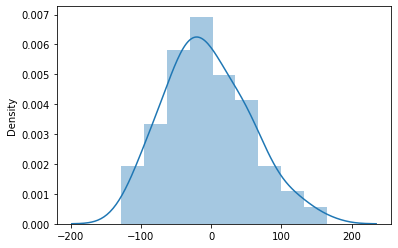

In [86]:
sns.distplot(y_test-linear.predict(x_test))
plt.show()

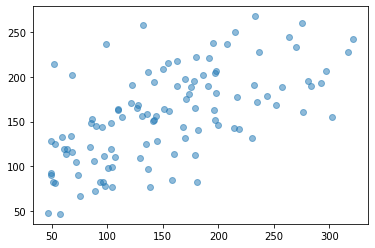

In [37]:
plt.scatter(y_test,linear.predict(x_test),alpha=.5)
plt.xlabel="y_test"
plt.ylabel="y_pred"
plt.show()

In [38]:
from sklearn import metrics

In [82]:
y_pred=linear.predict(x_test)

In [83]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

48.71074100677947
3603.4722772362647
60.0289286697361


In [41]:
metrics.r2_score(y_test,y_pred)

0.35940090989715523

In [84]:
print(metrics.mean_absolute_error(y_train,y_pred))
print(metrics.mean_squared_error(y_train,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

ValueError: Found input variables with inconsistent numbers of samples: [331, 111]